In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

> We will now import data

In [2]:
schema = pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_schema.csv")
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [3]:
results = pd.read_csv("../input/stack-overflow-developer-survey-results-2019/survey_results_public.csv")
results.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
results.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [5]:
results['UndergradMajor'].isnull().value_counts()

False    75614
True     13269
Name: UndergradMajor, dtype: int64

There are 13,269 entries in the column UndergradMajor that are NULL.

In [6]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [7]:
results.shape

(88883, 85)

*Now, we will remove the columns that we find redundant*

In [8]:
results.drop(columns={'Respondent','OpenSource','Student','EdLevel','EduOther','OrgSize','YearsCode','Age1stCode','MgrIdiot','MgrMoney','MgrWant','JobSeek','LastHireDate','LastInt','JobFactors','ResumeUpdate','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkRemote','ImpSyn','UnitTests','PurchaseHow','PurchaseWhat','OffOn','SocialMedia','Extraversion','ScreenName','SOVisit1st','SOVisitFreq','SOVisitTo','SOFindAnswer','SOTimeSaved','SOHowMuchTime','SOAccount','SOPartFreq','SOJobs','EntTeams','SOComm','SONewContent','Gender','Trans','Sexuality','Ethnicity','Dependents','SurveyLength','SurveyEase','FizzBuzz','CurrencySymbol','WelcomeChange','WorkPlan','WorkChallenge'},inplace=True)

In [9]:
results.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Country,UndergradMajor,DevType,YearsCodePro,CareerSat,JobSat,...,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,Age
0,I am a student who is learning to code,Yes,Never,"Not employed, and not looking for work",United Kingdom,NaN,NaN,NaN,NaN,NaN,...,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",14.0
1,I am a student who is learning to code,No,Less than once per year,"Not employed, but looking for work",Bosnia and Herzegovina,NaN,"Developer, desktop or enterprise applications;...",NaN,NaN,NaN,...,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,19.0
2,"I am not primarily a developer, but I write co...",Yes,Never,Employed full-time,Thailand,Web development or web design,"Designer;Developer, back-end;Developer, front-...",1,Slightly satisfied,Slightly satisfied,...,NaN,NaN,Vim;Visual Studio Code,Linux-based,I do not use containers,NaN,NaN,Yes,Yes,28.0
3,I am a developer by profession,No,Never,Employed full-time,United States,"Computer science, computer engineering, or sof...","Developer, full-stack",Less than 1 year,Very satisfied,Slightly satisfied,...,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,22.0
4,I am a developer by profession,Yes,Once a month or more often,Employed full-time,Ukraine,"Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",9,Very dissatisfied,Slightly dissatisfied,...,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,30.0


In [10]:
results.shape

(88883, 32)

> Now, we have several columns left and we will perform analysis on them using multiple graphs to come to a conclusion in the dataset.

**We will now analyse data columnwise, starting with the Main Branch**

In [11]:
results['MainBranch'].replace({'I am a student who is learning to code':'Student','I am not primarily a developer, but I write code sometimes as part of my work':'NoDeveloper','I am a developer by profession':'Developer', 'I code primarily as a hobby':'Novice','I used to be a developer by profession, but no longer am':'Ex-Developer'},inplace=True)

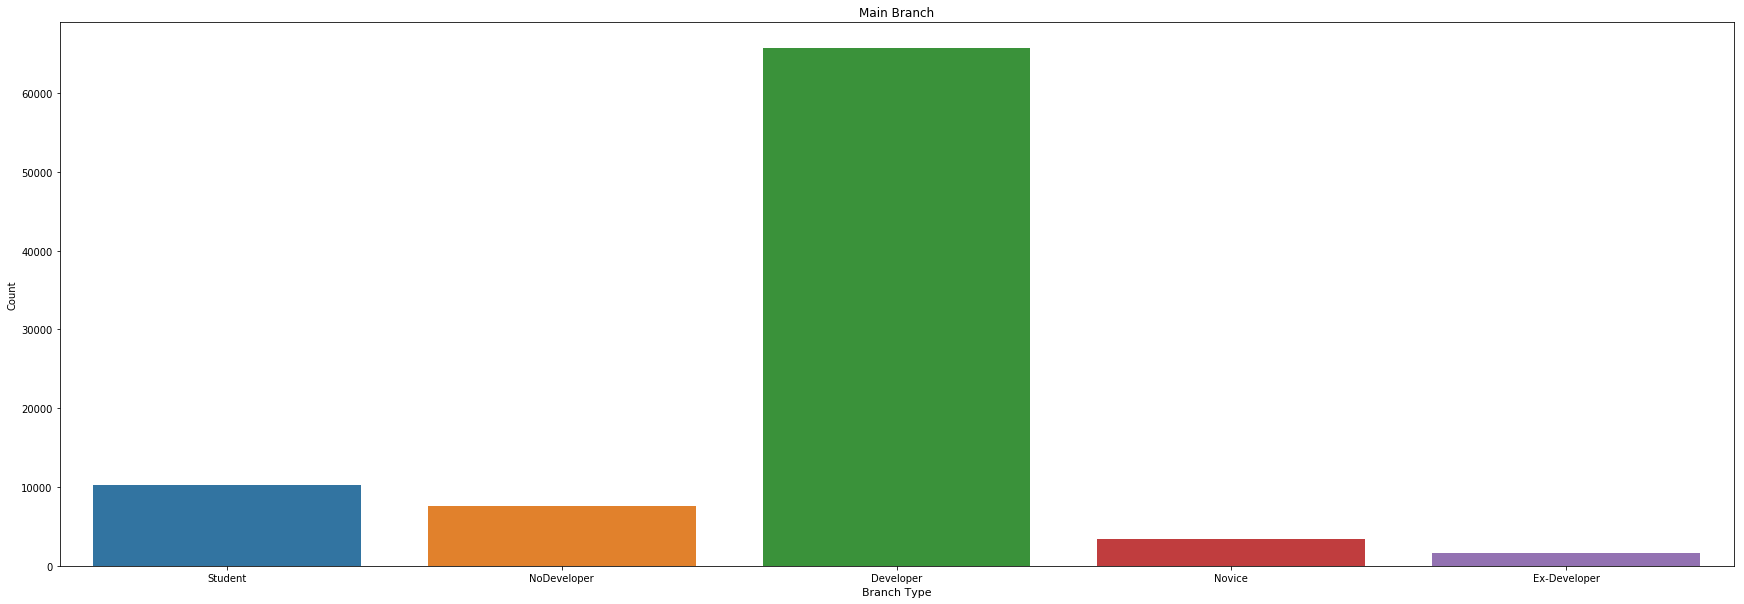

In [12]:
mainbranch=results['MainBranch'].dropna()
plt.figure(figsize=(30,10))
sns.countplot(x=mainbranch)
plt.xlabel('Branch Type', fontsize=11)
plt.ylabel('Count')
plt.title("Main Branch")
plt.show()

*It is very bevident that most people on StackOverflow are developers, so our further analysis will continue for only Developers*

In [13]:
developer = results[results['MainBranch']=='Developer']
developer.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Country,UndergradMajor,DevType,YearsCodePro,CareerSat,JobSat,...,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,Age
3,Developer,No,Never,Employed full-time,United States,"Computer science, computer engineering, or sof...","Developer, full-stack",Less than 1 year,Very satisfied,Slightly satisfied,...,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,22.0
4,Developer,Yes,Once a month or more often,Employed full-time,Ukraine,"Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",9,Very dissatisfied,Slightly dissatisfied,...,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,30.0
6,Developer,No,Never,"Independent contractor, freelancer, or self-em...",Ukraine,"Another engineering discipline (ex. civil, ele...","Designer;Developer, front-end",4,Slightly satisfied,Neither satisfied nor dissatisfied,...,NaN,NaN,PHPStorm,Windows,I do not use containers,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,42.0
8,Developer,Yes,Once a month or more often,Employed full-time,New Zealand,"Computer science, computer engineering, or sof...","Database administrator;Developer, back-end;Dev...",4,Slightly satisfied,Slightly satisfied,...,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,23.0
9,Developer,Yes,Once a month or more often,Employed full-time,India,NaN,Data or business analyst;Data scientist or mac...,10,Slightly dissatisfied,Slightly dissatisfied,...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,NaN


**Now, we will do some analysis on Hobbyist**

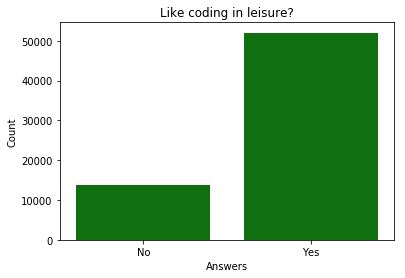

In [14]:
sns.countplot(x = 'Hobbyist' , data = developer, color = "Green")
plt.xlabel('Answers')
plt.ylabel('Count')
plt.title("Like coding in leisure?")
plt.show()

*We observe that most of the developers indeed love to cde in their leisure time! Now, lets see how many of them contibrute to OpenSource*

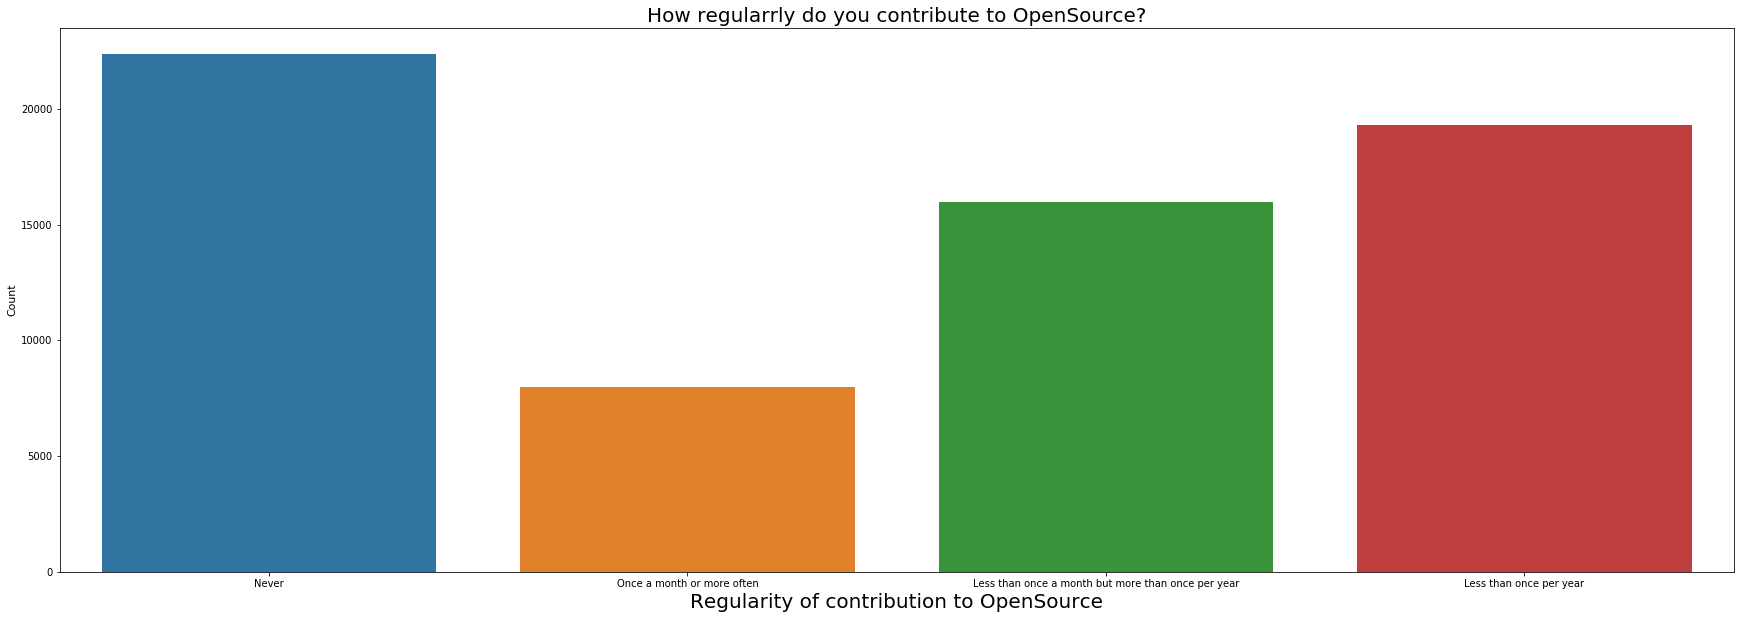

In [15]:
plt.figure(figsize=(30,10))
sns.countplot(x='OpenSourcer',data=developer)
plt.xlabel('Regularity of contribution to OpenSource', fontsize=20)
plt.ylabel('Count',fontsize=11)
plt.title("How regularrly do you contribute to OpenSource?",fontsize=20)
plt.show()

The statistics show that most of the people don't really contribute to OpenSource. Haha! Funny!

In [16]:
developer.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Country,UndergradMajor,DevType,YearsCodePro,CareerSat,JobSat,...,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,Age
3,Developer,No,Never,Employed full-time,United States,"Computer science, computer engineering, or sof...","Developer, full-stack",Less than 1 year,Very satisfied,Slightly satisfied,...,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,22.0
4,Developer,Yes,Once a month or more often,Employed full-time,Ukraine,"Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",9,Very dissatisfied,Slightly dissatisfied,...,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,30.0
6,Developer,No,Never,"Independent contractor, freelancer, or self-em...",Ukraine,"Another engineering discipline (ex. civil, ele...","Designer;Developer, front-end",4,Slightly satisfied,Neither satisfied nor dissatisfied,...,NaN,NaN,PHPStorm,Windows,I do not use containers,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,42.0
8,Developer,Yes,Once a month or more often,Employed full-time,New Zealand,"Computer science, computer engineering, or sof...","Database administrator;Developer, back-end;Dev...",4,Slightly satisfied,Slightly satisfied,...,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,23.0
9,Developer,Yes,Once a month or more often,Employed full-time,India,NaN,Data or business analyst;Data scientist or mac...,10,Slightly dissatisfied,Slightly dissatisfied,...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,NaN


**Next we have the Employment status of these people**

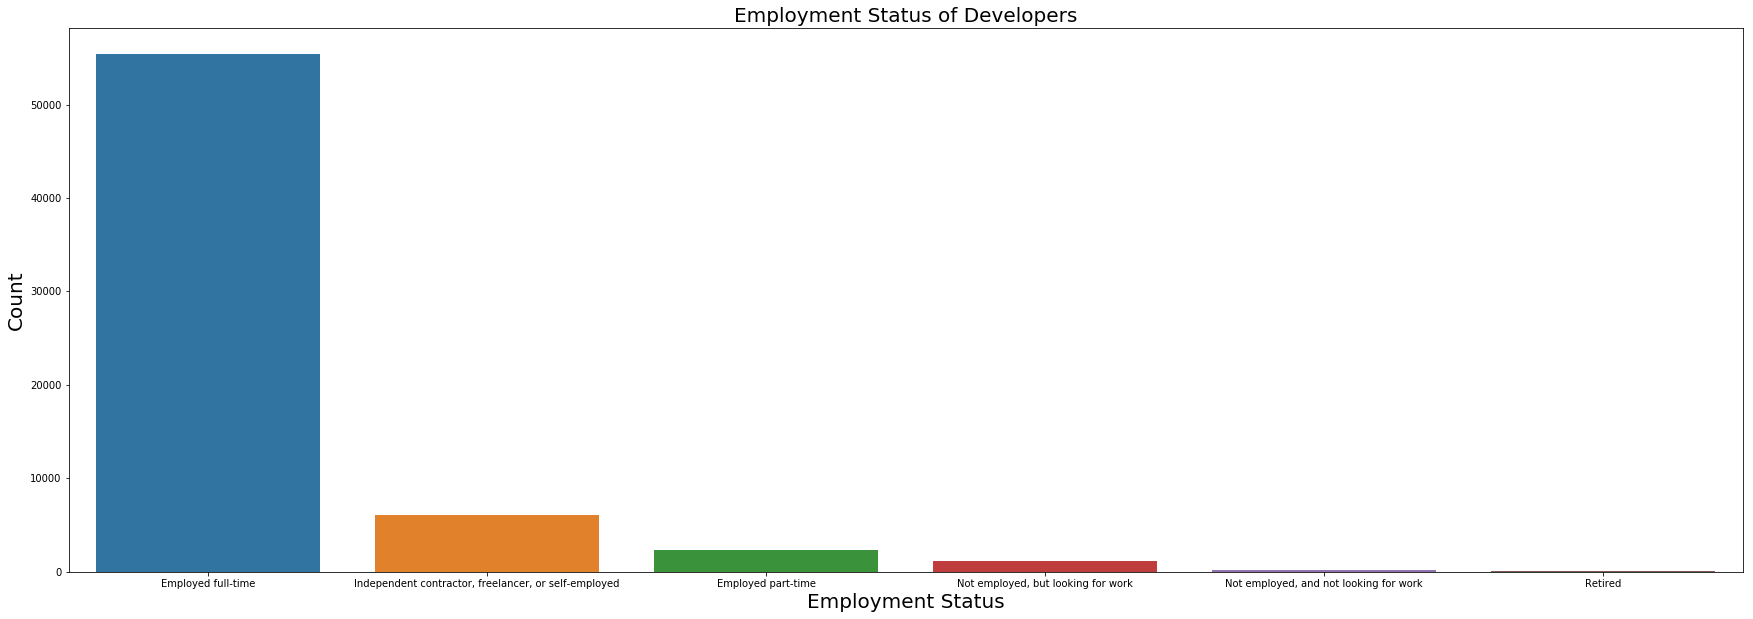

In [17]:
plt.figure(figsize=(30,10))
sns.countplot(x='Employment',data=developer)
plt.xlabel('Employment Status', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Employment Status of Developers",fontsize=20)
plt.show()

*We find that most people in the dataset are Full-time employed.*
**Let's check what counytries they belong to**

In [18]:
newdata = developer.copy()
newdata['CareerSat'].replace({'Slightly satisfied':1, 'Very satisfied':4, 'Very dissatisfied':0,
       'Slightly dissatisfied':3, 'Neither satisfied nor dissatisfied':2},inplace=True)
##Changing the string values to numerical values
newdata.head()

,MainBranch,Hobbyist,OpenSourcer,Employment,Country,UndergradMajor,DevType,YearsCodePro,CareerSat,JobSat,...,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,Age
3,Developer,No,Never,Employed full-time,United States,"Computer science, computer engineering, or sof...","Developer, full-stack",Less than 1 year,4.0,Slightly satisfied,...,.NET,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Windows,I do not use containers,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,22.0
4,Developer,Yes,Once a month or more often,Employed full-time,Ukraine,"Computer science, computer engineering, or sof...","Academic researcher;Developer, desktop or ente...",9,0.0,Slightly dissatisfied,...,Cordova;Node.js,Apache Spark;Hadoop;Node.js;React Native,IntelliJ;Notepad++;Vim,Linux-based,"Outside of work, for personal projects",Not at all,NaN,Yes,Also Yes,30.0
6,Developer,No,Never,"Independent contractor, freelancer, or self-em...",Ukraine,"Another engineering discipline (ex. civil, ele...","Designer;Developer, front-end",4,1.0,Neither satisfied nor dissatisfied,...,NaN,NaN,PHPStorm,Windows,I do not use containers,NaN,"Useful for decentralized currency (i.e., Bitcoin)",No,Yes,42.0
8,Developer,Yes,Once a month or more often,Employed full-time,New Zealand,"Computer science, computer engineering, or sof...","Database administrator;Developer, back-end;Dev...",4,1.0,Slightly satisfied,...,Node.js;Unity 3D,Node.js,Vim,MacOS,Development;Testing;Production,Not at all,An irresponsible use of resources,No,SIGH,23.0
9,Developer,Yes,Once a month or more often,Employed full-time,India,NaN,Data or business analyst;Data scientist or mac...,10,3.0,Slightly dissatisfied,...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,NaN


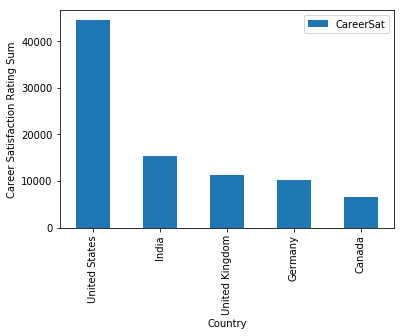

In [19]:
careersat=newdata.groupby('Country')['CareerSat'].sum().sort_values(ascending=False).head().reset_index()
careersat.plot.bar(x='Country',y='CareerSat')
plt.xlabel('Country',fontsize=10)
plt.ylabel("Career Satisfaction Rating Sum",fontsize=10)
plt.show()

*Claerly, we can see that maximum people are from the US.
Checking for Undergraduate Major*

In [20]:
developer['UndergradMajor'].value_counts().head()

Computer science, computer engineering, or software engineering          39886
Another engineering discipline (ex. civil, electrical, mechanical)        4469
Information systems, information technology, or system administration     3922
Web development or web design                                             2701
A natural science (ex. biology, chemistry, physics)                       2125
Name: UndergradMajor, dtype: int64

*So, most people are from the domian of Computer Science.
Checking for Development type*

In [21]:
developer['DevType'].value_counts().head()

Developer, full-stack                                             8077
Developer, back-end                                               4703
Developer, back-end;Developer, front-end;Developer, full-stack    2329
Developer, mobile                                                 2061
Developer, front-end                                              2035
Name: DevType, dtype: int64

*Majority of the population is a full-stack developer. Moving to Career Satisfaction*

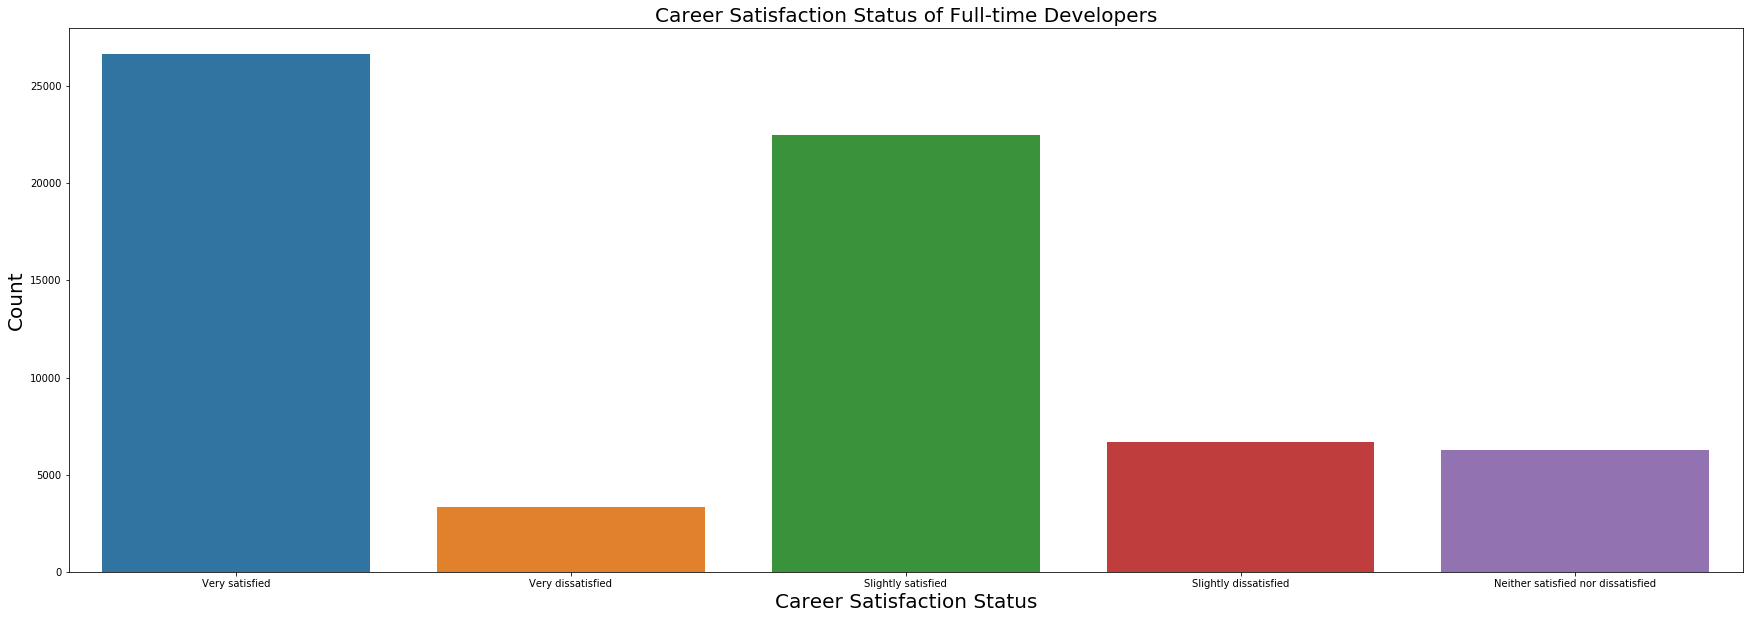

In [22]:
plt.figure(figsize=(30,10))
sns.countplot(x='CareerSat',data=developer)
plt.xlabel('Career Satisfaction Status', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Career Satisfaction Status of Full-time Developers",fontsize=20)
plt.show()

*The analysis says that most poeple are very satisfied by their jobs. that's terrific!*
**Checking the data on Years of Coding**

In [23]:
developer['YearsCodePro'].unique()
developer['YearsCodePro'].replace({'Less than 1 year':0,'More than 50 years':51},inplace=True)
yearscode=developer['YearsCodePro'].dropna()
yearscode=yearscode.astype(int)
maxyear=yearscode.max()
if(maxyear==51):
    print ('Coding as a professional needs at most 50 years')
else:
    print ('Coding as a professional needs at most ',max_year,'years')

Coding as a professional needs at most 50 years


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
developer['YearsCodePro'].value_counts().head(3)

2    6935
3    6924
5    5738
Name: YearsCodePro, dtype: int64

In [25]:
minyear=yearscode.min()
if(minyear==0):
    print ('Coding as a professional needs at least 1 year')
else:
    print ('Coding as a professional needs at least ',min_year,'years')

Coding as a professional needs at least 1 year


**We've done great work! Let's check how many poeple are satisfied with their Jobs.**

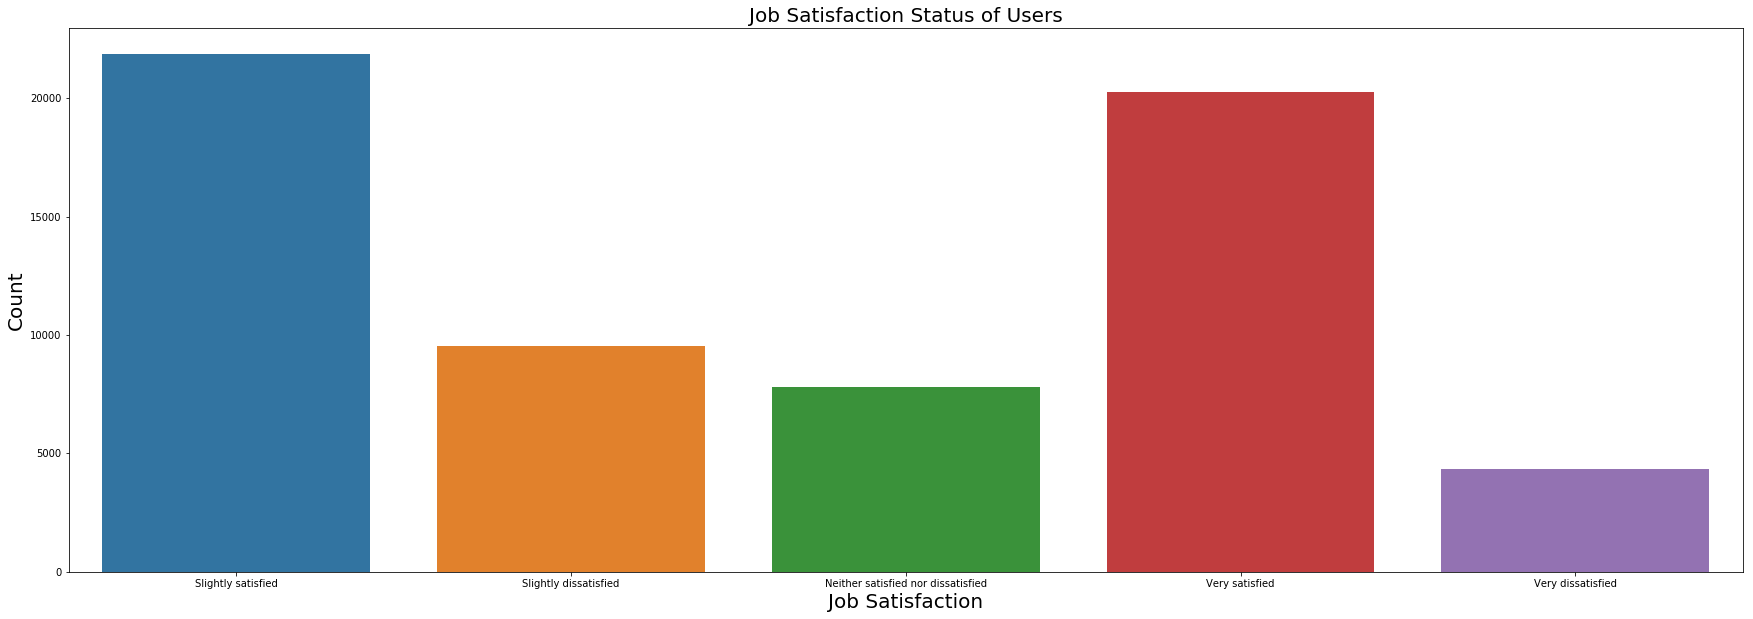

In [26]:
plt.figure(figsize=(30,10))
sns.countplot(x='JobSat',data = developer)
plt.xlabel('Job Satisfaction', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title("Job Satisfaction Status of Users",fontsize=20)
plt.show()

*The analysis says that most people are slightly satisfied and very satisfied with their jobs*

In [27]:
##Changing the string values to numerical values
developer['JobSat'].replace({'Slightly satisfied':1, 'Very satisfied':4, 'Very dissatisfied':0,
       'Slightly dissatisfied':3, 'Neither satisfied nor dissatisfied':2},inplace=True)

In [28]:
developer.columns

Index(['MainBranch', 'Hobbyist', 'OpenSourcer', 'Employment', 'Country',
       'UndergradMajor', 'DevType', 'YearsCodePro', 'CareerSat', 'JobSat',
       'WorkWeekHrs', 'WorkLoc', 'CodeRev', 'CodeRevHrs', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'Age'],
      dtype='object')

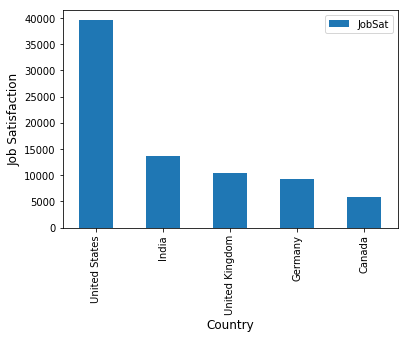

In [29]:
careersat=developer.groupby('Country')['JobSat'].sum().sort_values(ascending=False).head().reset_index()
careersat.plot.bar(x='Country',y='JobSat')
plt.xlabel('Country',fontsize=12)
plt.ylabel("Job Satisfaction",fontsize=12)
plt.show()

**Now, we will focus on how many hours people have to work in their country.**

In [30]:
hours=developer.groupby('Country')['WorkWeekHrs'].sum().sort_values(ascending=False).reset_index()

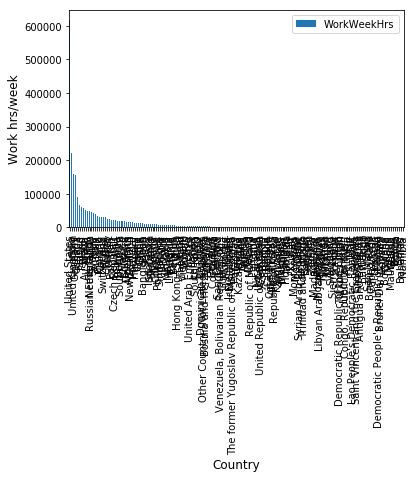

In [31]:
hours.plot.bar(x='Country',y='WorkWeekHrs')
plt.xlabel('Country',fontsize=12)
plt.ylabel("Work hrs/week",fontsize=12)
plt.show()

*Sadly we cannot understand anything, so we will limit the data to the top 5 entries*

In [32]:
hours=developer.groupby('Country')['WorkWeekHrs'].sum().sort_values(ascending=False).head().reset_index()

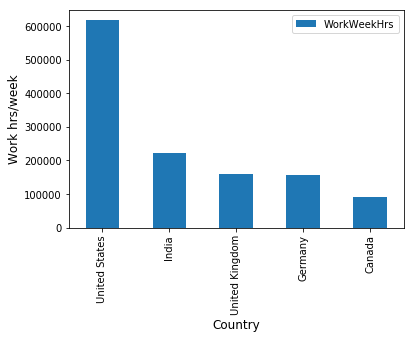

In [33]:
hours.plot.bar(x='Country',y='WorkWeekHrs')
plt.xlabel('Country',fontsize=12)
plt.ylabel("Work hrs/week",fontsize=12)
plt.show()

*The Americans are the ones that do the maximum work in a week and also the ones most satisfied with their jobs.*
**Working on the analysis of their work location preferences**

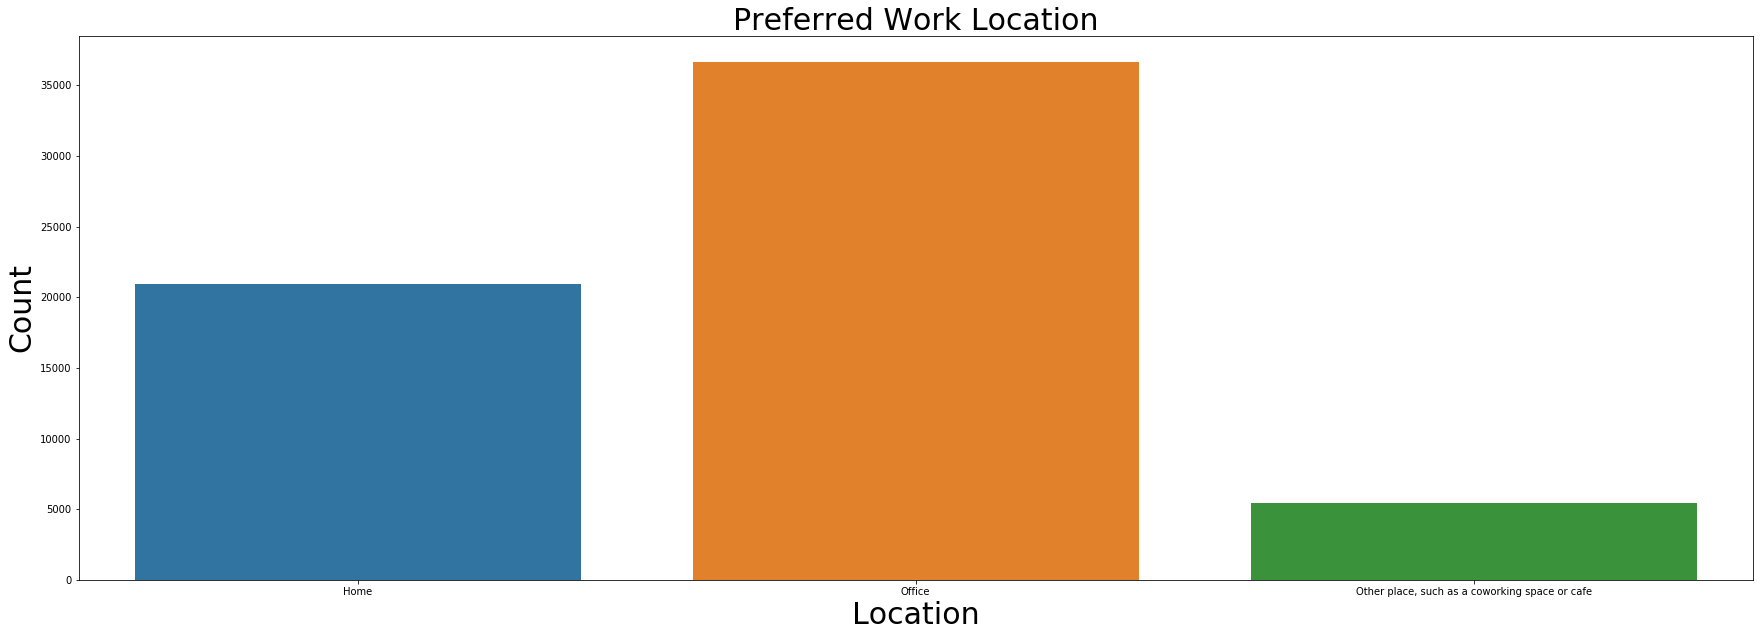

In [34]:
plt.figure(figsize=(30,10))
sns.countplot(x='WorkLoc',data=developer)
plt.xlabel('Location', fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.title("Preferred Work Location",fontsize=30)
plt.show()

*We can clearly see that most people like to work while they are at office*

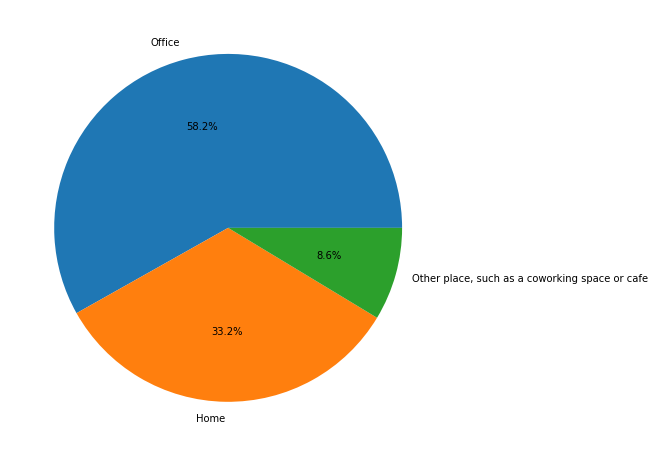

In [35]:
location=developer['WorkLoc'].value_counts().reset_index()
plt.figure(figsize=(10,8))
plt.pie(location['WorkLoc'],labels=location['index'], autopct='%.1f%%')
plt.show()

*The pie chart says the same stats*
**Perfroming analysis on how much they review the code**

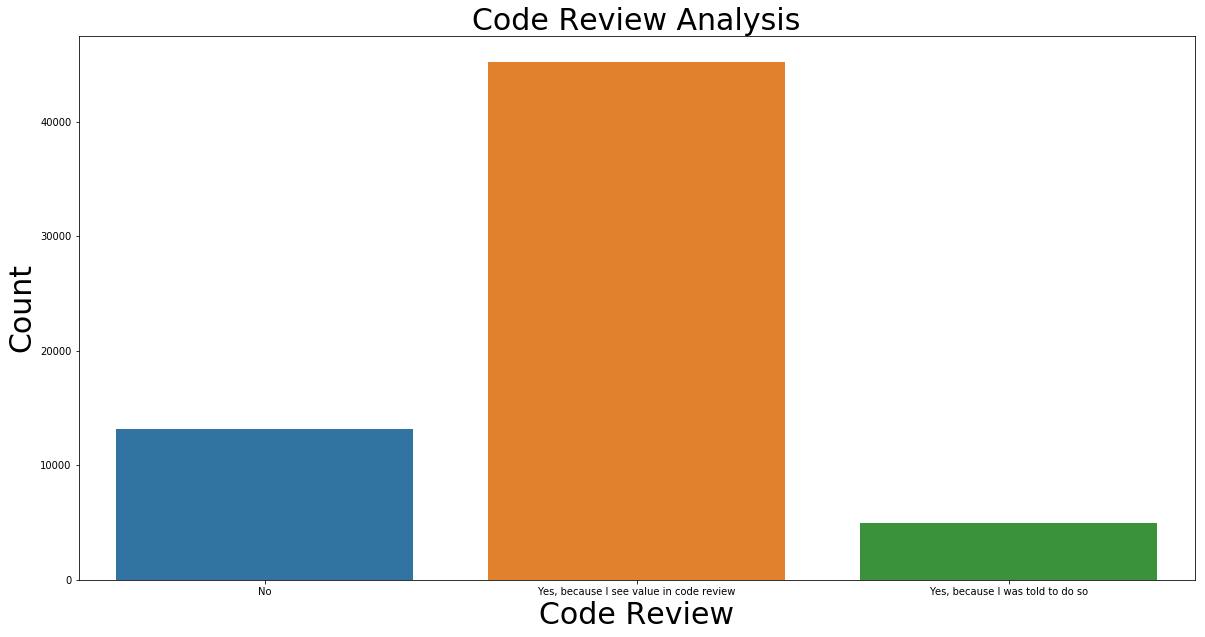

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='CodeRev',data=developer)
plt.xlabel('Code Review', fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.title("Code Review Analysis",fontsize=30)
plt.show()

*Its good to know that a lot of people actually value code review and there do it*

**Checking how much time they spend while doing the code review**

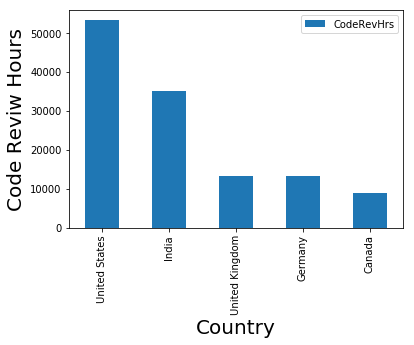

In [37]:
coderev=developer.groupby('Country')['CodeRevHrs'].sum().sort_values(ascending=False).head().reset_index()
coderev.plot.bar(x='Country',y='CodeRevHrs')
plt.xlabel('Country',fontsize=20)
plt.ylabel("Code Reviw Hours",fontsize=20)
plt.show()

*The Americans and the Indians spend the maximum time while reviewing the code*

Examining the rest of the work

In [38]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
def chart (column, color):
    entry = ''
    for i in developer[column]:
        try:
            entry1=i.split(';')
            for j in entry1:
                entry = entry + ' ' + j
        except:
             entry1 = -999
    word_cloud = WordCloud(background_color=color,max_font_size=300,width=2000, height=1080).generate(entry)
    plt.figure(figsize=(20,8))
    plt.imshow(word_cloud)

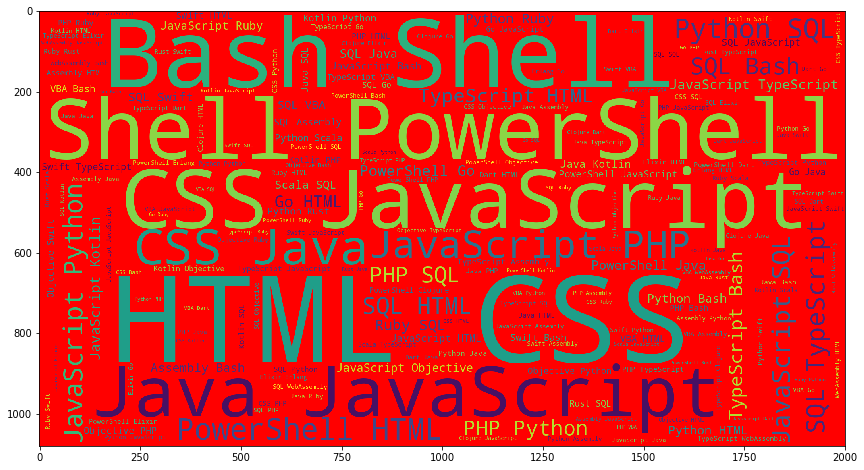

In [39]:
chart('LanguageWorkedWith','Red')

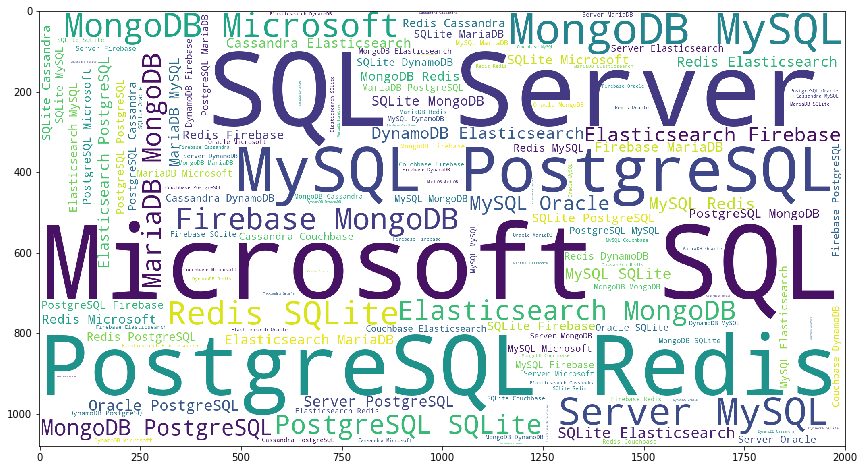

In [40]:
chart('DatabaseDesireNextYear','White')

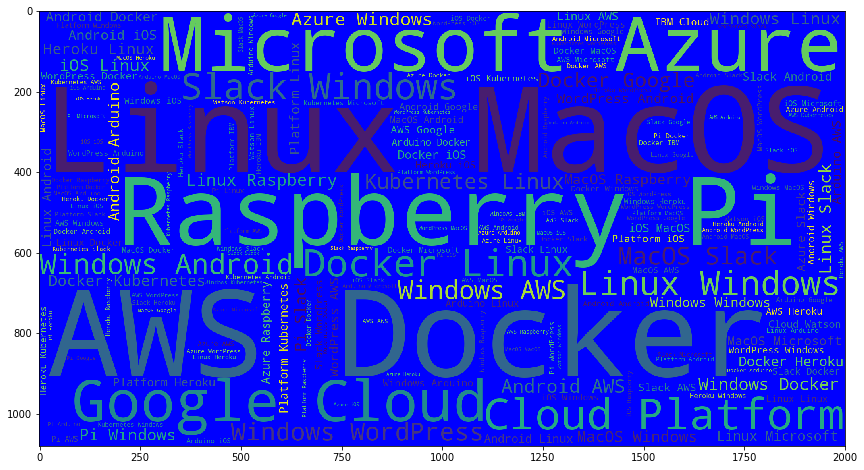

In [41]:
chart('PlatformWorkedWith','Blue')

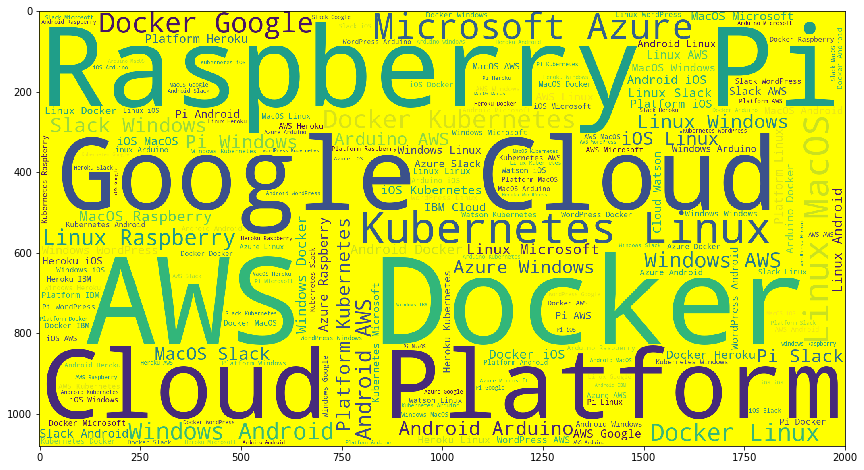

In [42]:
chart('PlatformDesireNextYear','Yellow')

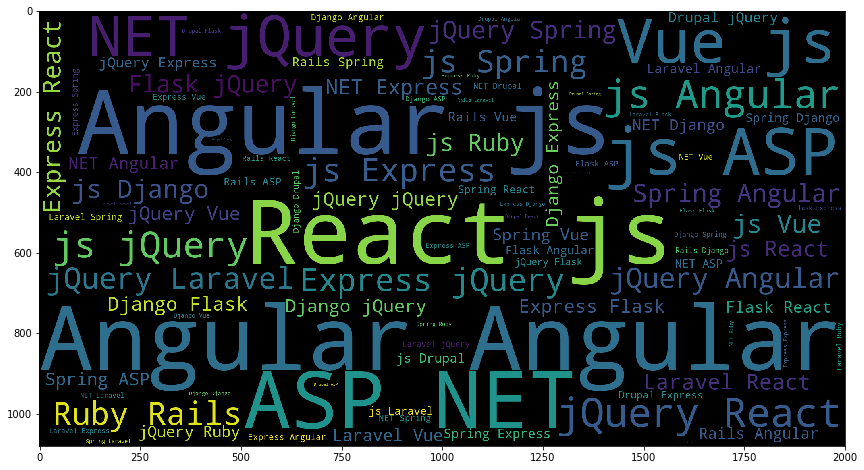

In [43]:
chart('WebFrameWorkedWith','Black')

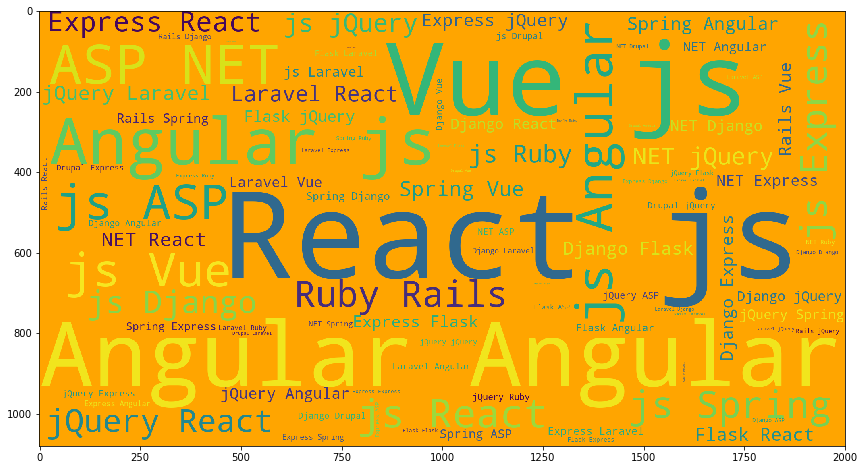

In [44]:
chart('WebFrameDesireNextYear','Orange')

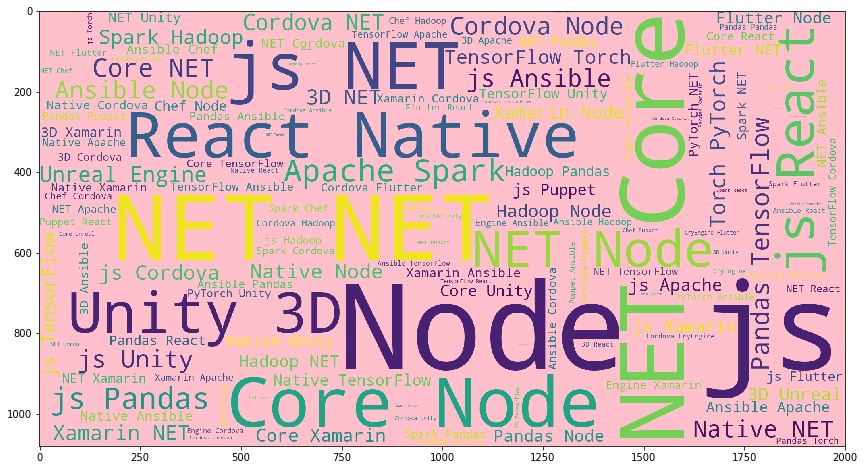

In [45]:
chart('MiscTechWorkedWith','Pink')

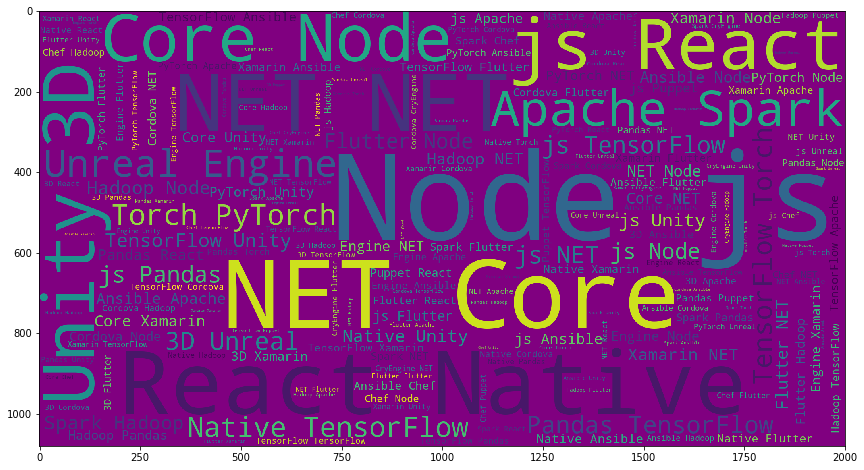

In [46]:
chart('MiscTechDesireNextYear','Purple')

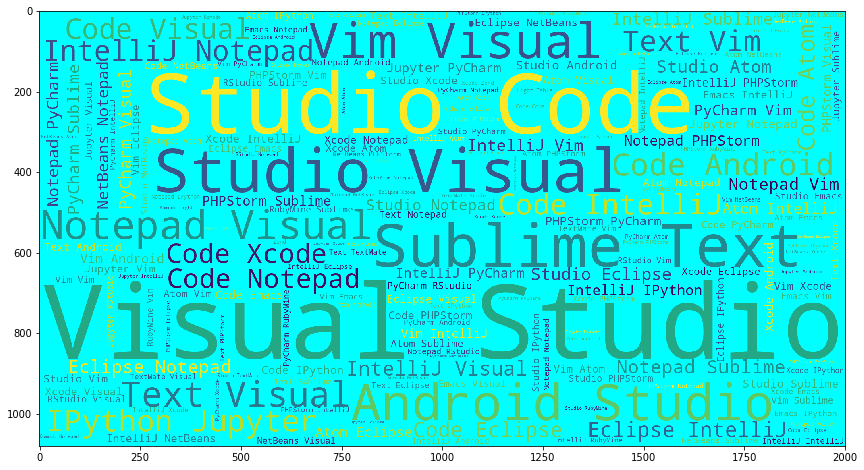

In [47]:
chart('DevEnviron','Cyan')

In [48]:
developer['OpSys'].value_counts()

Windows        29235
MacOS          19614
Linux-based    16245
BSD               64
Name: OpSys, dtype: int64

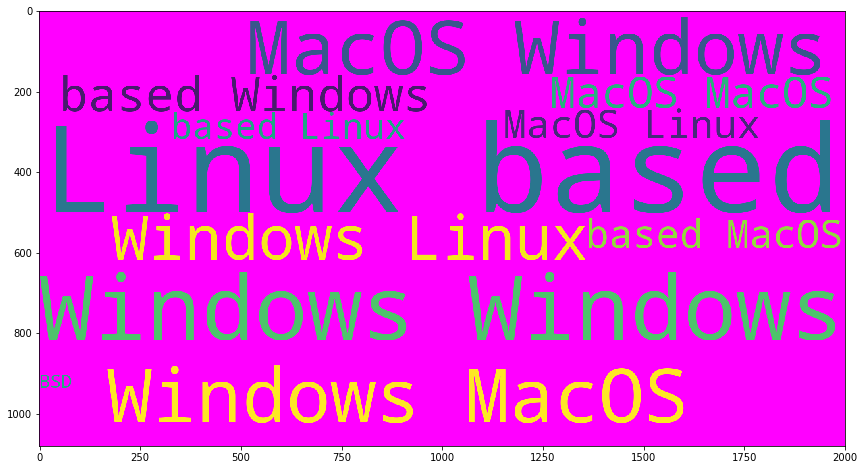

In [49]:
chart('OpSys','Magenta')

**Analysis on BlockChain Organization**

In [50]:
developer['BlockchainOrg'].value_counts()

Not at all                                                 33569
Non-currency applications of blockchain                     5170
Implementing cryptocurrency-based products                  1669
Accepting Bitcoin or other coins and tokens as payments      791
Implementing our own cryptocurrency                          543
Name: BlockchainOrg, dtype: int64

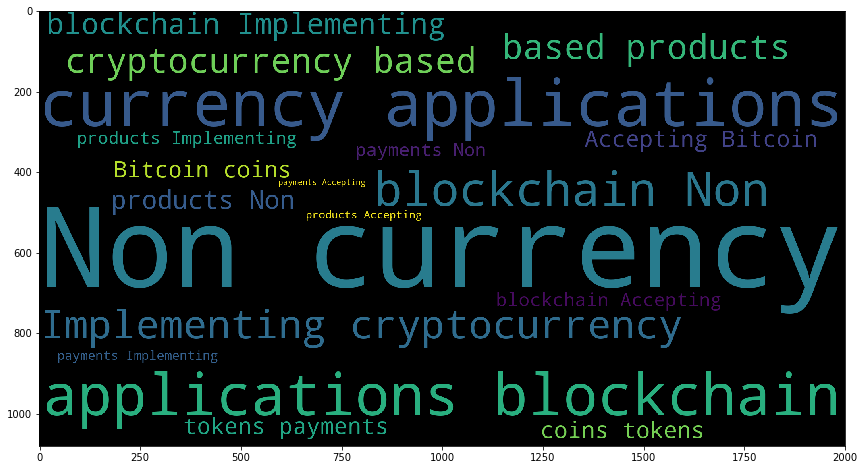

In [51]:
chart('BlockchainOrg', 'Black')

**Analysis on Age**

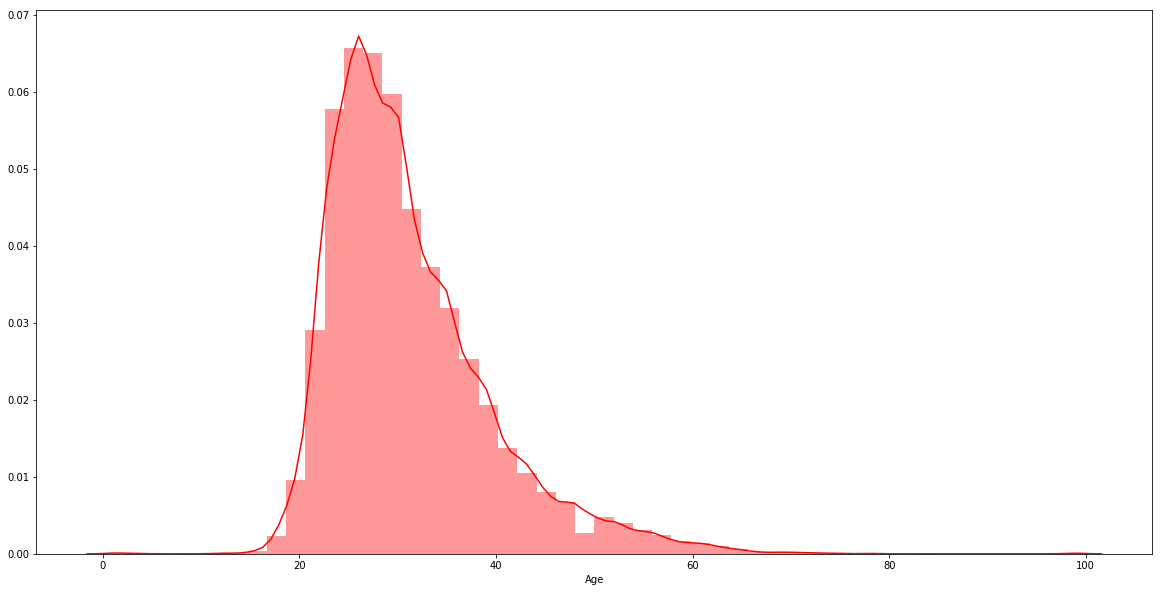

In [52]:
age=developer['Age'].dropna()
plt.figure(figsize=(20,10))
sns.distplot(age, color = 'Red')